# Yield Optimizer

## Problem Statement
In agriculture, selecting the right **crop** for a specific soil type is crucial for maximizing yield and sustainability. Farmers often face challenges in determining which crops will thrive in their soil based on its nutrient composition. This project seeks to address this challenge by utilizing a dataset containing information about soil samples and their associated crop types.

The dataset includes features such as the levels of **Nitrogen**, **Phosphorus**, and **Potassium**, along with the soil's **pH value**. The goal is to train a machine learning model to accurately predict the **crop type** (target variable) that is best suited for each soil sample. By doing so, this project aim to provide farmers and agricultural planners with a reliable tool to guide crop selection and improve agricultural outcomes.

# My Solution

The aim of this project is to develop a machine learning model that predicts the most suitable crop type for a given soil sample based on its nutrient composition. **Agriculture productivity** heavily relies on the compatibility between the soil's chemical properties and the crop's nutrient requirements. By leveraging data on **soil nutrients** and **pH levels**, we can optimize crop selection, leading to better **yields** and more efficient use of resources.

## Import the necessary libraries.


In [123]:
# Import necessary libraries for data analysis, visualization, and machine learning.
import os
import numpy as np  
import pandas as pd 
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt  
import seaborn as sns  
import missingno as msno  
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression 
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras import optimizers 


import warnings
warnings.filterwarnings("ignore")



# Print a confirmation message indicating that the libraries have been successfully imported.
print("All necessary libraries have been successfully imported and are ready for use!")

All necessary libraries have been successfully imported and are ready for use!


In [32]:
# Set random seed for reproducability.
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(66)


# Print the version of each library.
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Missingno version:', msno.__version__)
print('Scikit-learn version:', sklearn.__version__)
print('XGBoost version:', xgb.__version__)
print('TensorFlow version:', tf.__version__)
try:
    print('Keras version in TensorFlow:', tf.keras.__version__)
except AttributeError:
    print('Keras version information is not directly accessible.')

Numpy version: 1.25.2
Pandas version: 2.1.0
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
Missingno version: 0.5.2
Scikit-learn version: 1.3.0
XGBoost version: 2.0.3
TensorFlow version: 2.15.0
Keras version information is not directly accessible.


## Exolore the Data.

In [33]:
# Load the CSV file into a DataFrame.
crop_data = pd.read_csv('soilmeasures.csv')

# Display the first 10 rows of the DataFrame to get an overview of the data.
crop_data.head(10)

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
5,69,37,42,7.073454,rice
6,69,55,38,5.700806,rice
7,94,53,40,5.718627,rice
8,89,54,38,6.685346,rice
9,68,58,38,6.336254,rice


## Dataset Overview
This dataset contains agricultural information about various soil samples, detailing the chemical properties and nutrient levels of the soil. Each record in the dataset represents a specific farmland plot with a crop type that yields well on that soil.

**Target Variable**: The final column, **crop**, indicates the type of crop that is most suitable for each soil sample. This is the variable we aim to predict using our model.
**Feature Variables**: The remaining columns represent the soil's chemical composition and nutrient levels, which include: <br>
**Nitrogen**: The amount of nitrogen in the soil. <br>
**Phosphorus**: The amount of phosphorus in the soil. <br>
**Potassium**: The amount of potassium in the soil. <br>
**pH Level**: The pH value of the soil. <br>

These features are used to train the model to predict the most suitable **crop** type for a given soil, optimizing agricultural yields based on soil composition.

In [34]:
# Check the shape and size of the DataFrame.
rows, columns = crop_data.shape
shape = f"The crop DataFrame has {rows} rows and {columns} columns."
size = f"The crop DataFrame contains {crop_data.size} data points."

print(shape + " " + size)

The crop DataFrame has 2200 rows and 5 columns. The crop DataFrame contains 11000 data points.


In [35]:
# Display summary information about the crop DataFrame, including the data types and non-null counts.
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [36]:
# Rename columns for more descriptive names.
crop_data.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorus', 'K': 'Potassium', 'ph': 'pH Level'}, inplace=True)

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Summary Statistics of the Features')

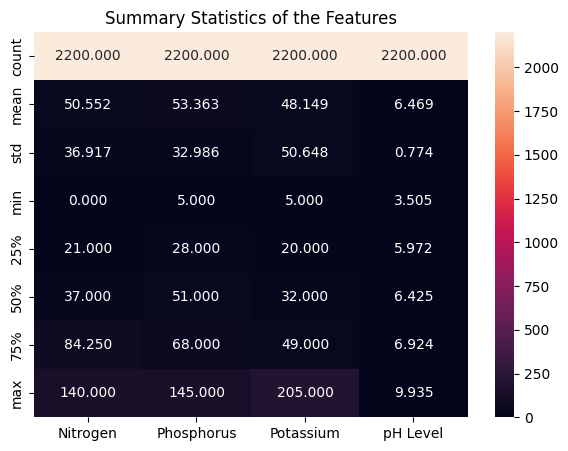

In [39]:
# Get summary statistics for the DataFrame.
summary_stats = crop_data.describe()

# Create a figure and axis object for plotting.
fig, ax = plt.subplots(figsize=(7, 5))

# Plot a heatmap of the summary statistics.
sns.heatmap(summary_stats, annot=True, fmt=".3f", ax=ax)

# Set the title of the heatmap.
ax.set_title("Summary Statistics of the Features")

From the figure displaying the summary statistics of the features above, we can observe the following:
    
- The mean and median of the Phosphorus (P) and pH Level columns are relatively close to each other.
- In contrast, the mean and median of the Potassium (K) and Nitrogen (N) columns are significantly different, indicating a skewed distribution.

Nitrogen      0
Phosphorus    0
Potassium     0
pH Level      0
crop          0
dtype: int64


Text(0.5, 1.0, 'Missing Data Matrix')

<Figure size 700x500 with 0 Axes>

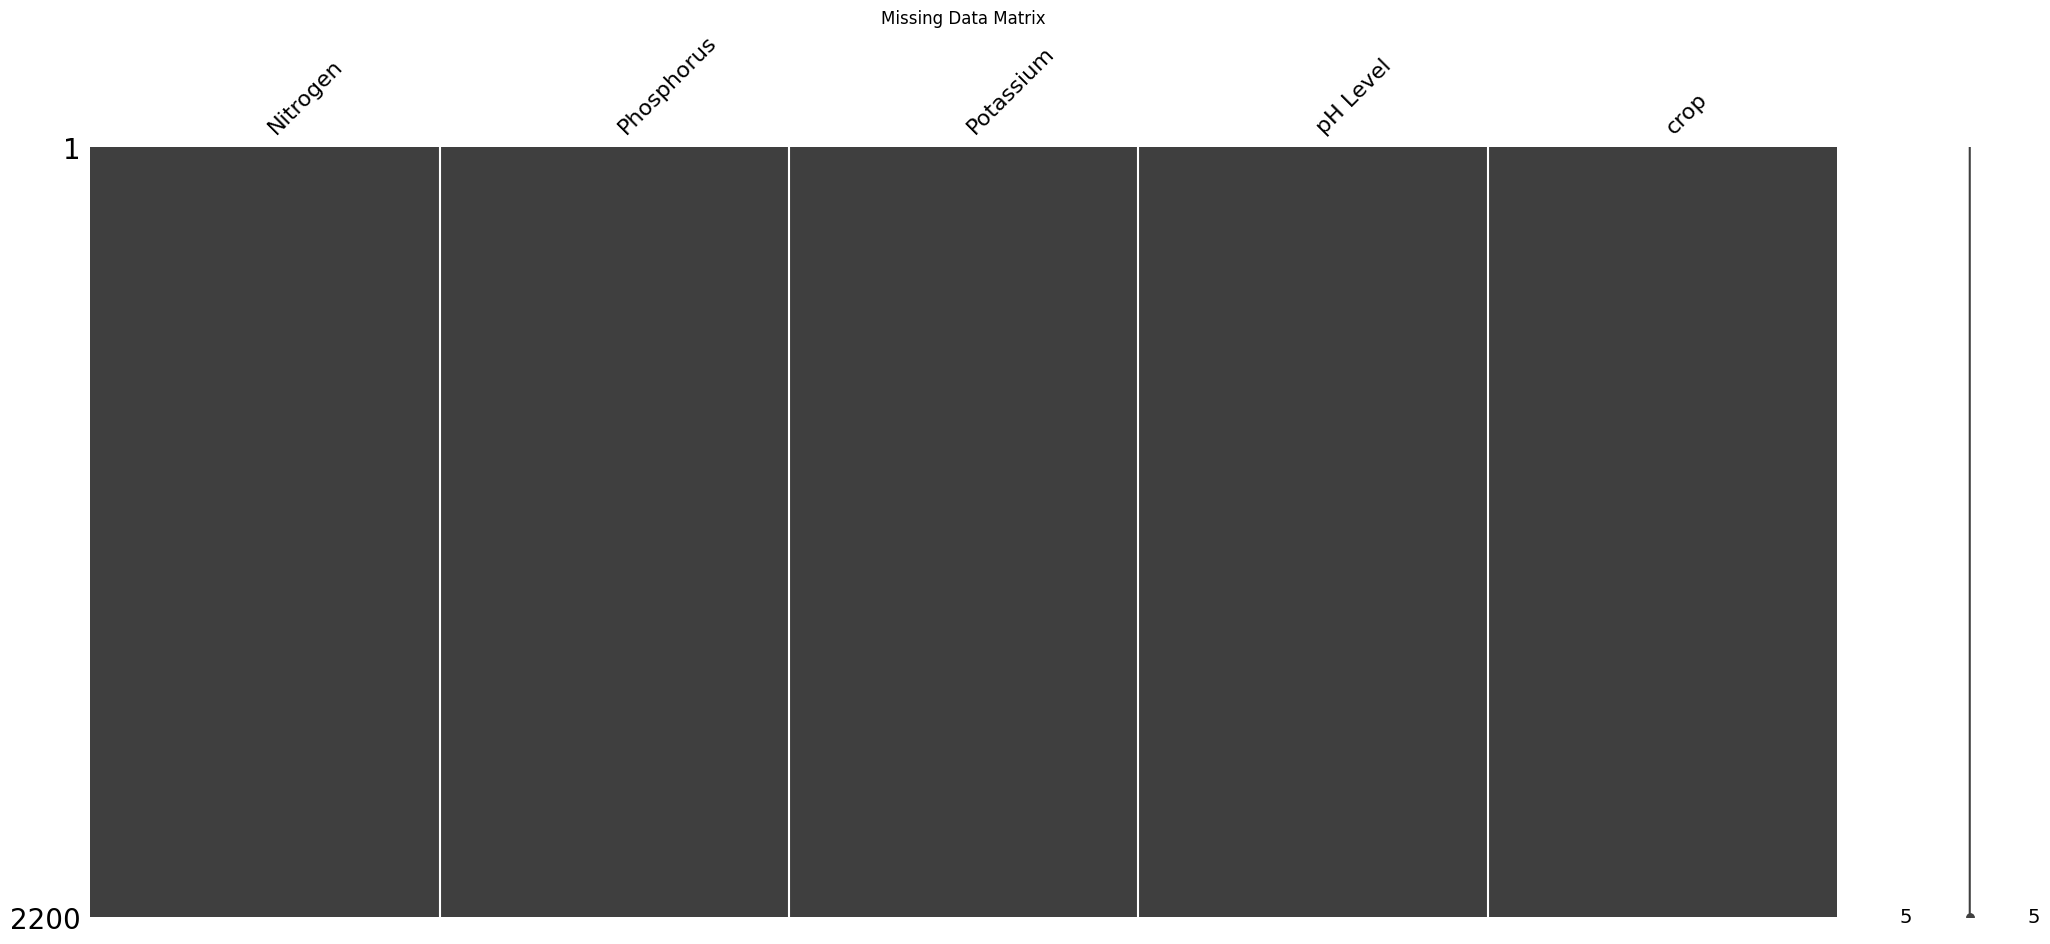

In [40]:
# Calculate the number of missing values for each column and sort the results.
missing_values_count = crop_data.isna().sum().sort_values()

# Print the sorted count of missing values for each column.
print(missing_values_count)


# Display a matrix of missing values in the DataFrame.
plt.figure(figsize=(7, 5))
msno.matrix(crop_data)
plt.title('Missing Data Matrix')

The output and the missing data matrix above indicate that the crop DataFrame has no **missing values**. Therefore, we can proceed with further analysis.

In [54]:
# Check for duplicate values in the crop DataFrame.
duplicate_value = crop_data.duplicated(subset=["Nitrogen", "Phosphorus", "Potassium", "pH Level"], keep=False)

print(crop_data[duplicate_value])


# duplicate_value = crop_data.duplicated(subset=["Nitrogen", "Phosphorus", "Potassium"], keep=False)


# duplicate_value = crop_data.duplicated(subset=["Nitrogen", "Phosphorus"], keep=False)


# duplicate_value = crop_data.duplicated(keep=False)

Empty DataFrame
Columns: [Nitrogen, Phosphorus, Potassium, pH Level, crop]
Index: []


There are no duplicate values in this dataframe; however, different farm plots often have similar soil contents (such as Nitrogen, Phosphorus, and Potassium), but they consistently differ in pH level and the type of crop that will yield well on the farm plot.

In [55]:
# The target variable consists of classes. Check the number of classes to consider while building the model.
unique_classes = crop_data["crop"].unique()

print(f"There are {len(unique_classes)} classes to predict.")

There are 22 classes to predict.


Text(0, 0.5, 'Frequency')

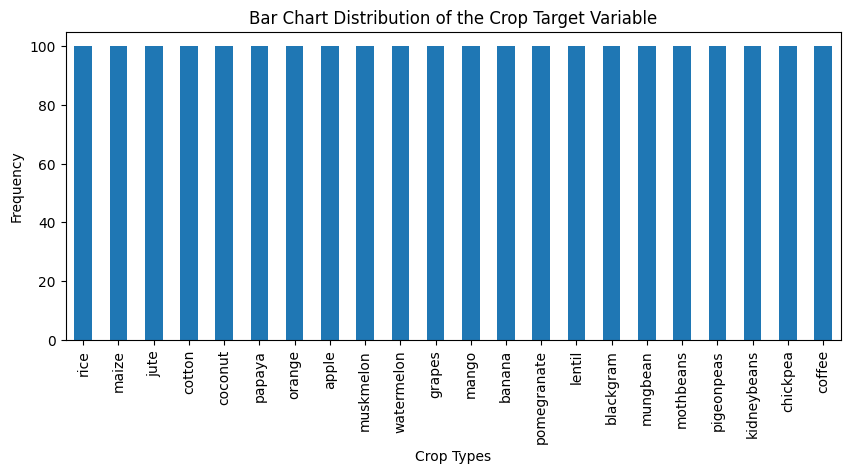

In [58]:
# Create a figure and axes object with a specified size for the plot.
fig, ax = plt.subplots(figsize=(10, 4))

# Get the counts of each crop type in the dataset.
num_crop_types = crop_data["crop"].value_counts()    

# Plot a bar chart to visualize the distribution of crop types.
num_crop_types.plot(kind="bar")
plt.title("Bar Chart Distribution of the Crop Target Variable")
plt.xlabel("Crop Types")
plt.ylabel("Frequency")

From the bar plot above, we can see that the target variable has 22 classes, with each class having an equal number of instances. This indicates that the classes are balanced. Also, this is a multi-class classification problem.

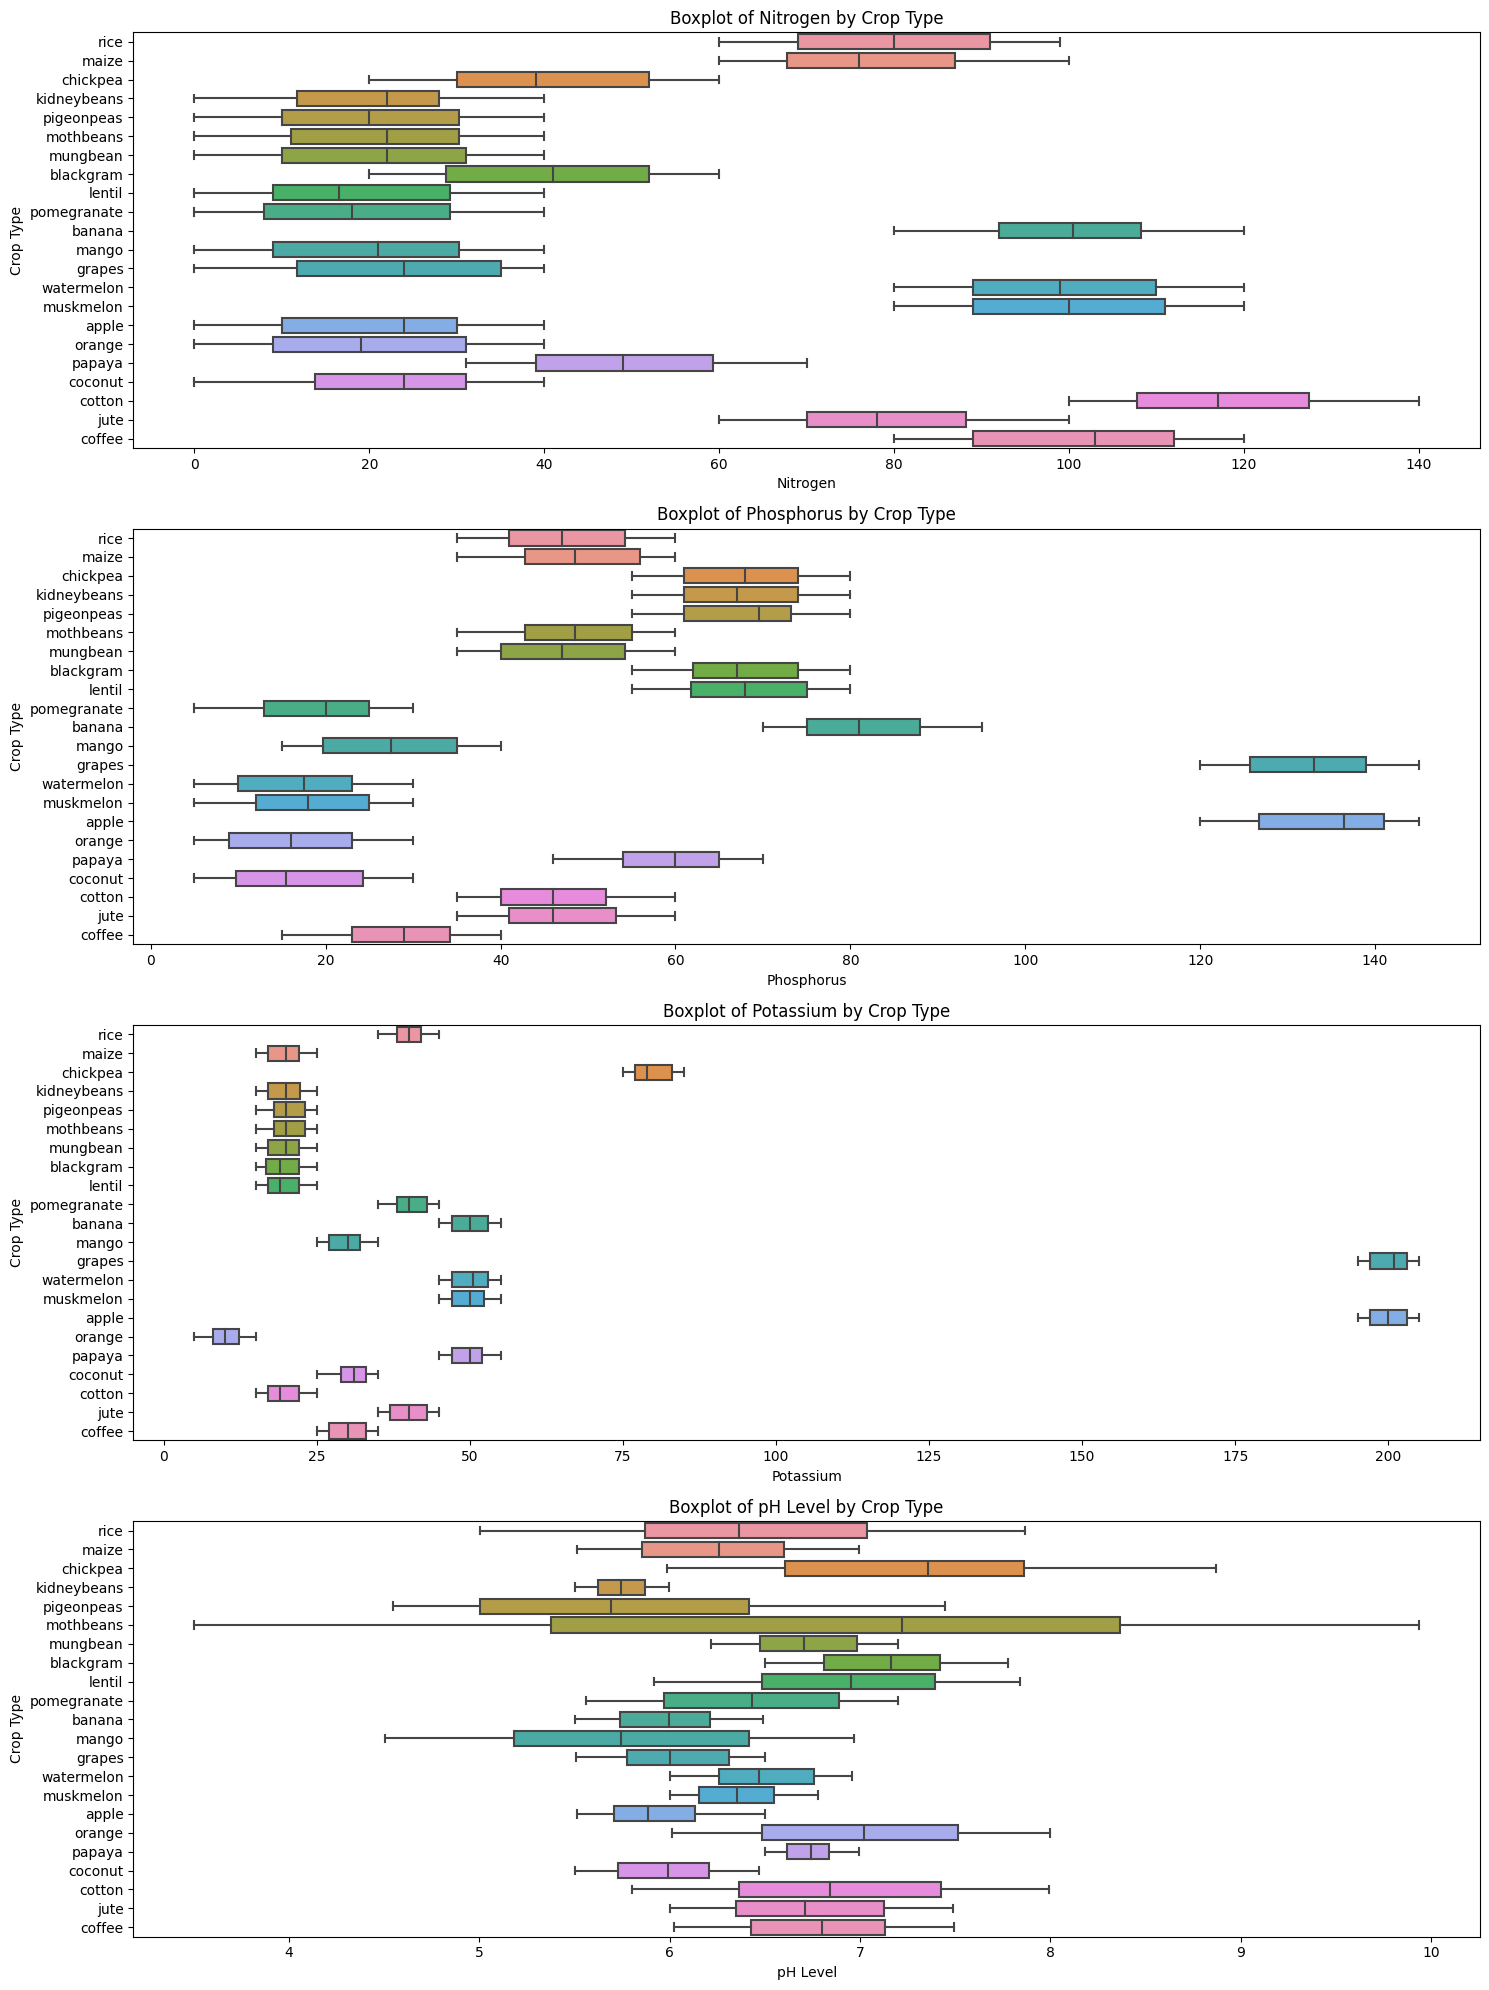

In [60]:
# Create a figure with 4 subplots arranged in a single column, each with a specified size.
fig, ax = plt.subplots(4, 1, figsize=(15, 20))

# Get the feature names from the dataset, excluding the target variable.
feature_names = list(crop_data.columns)[:-1]

# Plot a boxplot for the distribution of each feature by crop type.
for index, feature_name in enumerate(feature_names):
    sns.boxplot(data=crop_data, x=feature_name, y="crop", ax=ax[index])
    ax[index].set_title(f"Boxplot of {feature_name} by Crop Type")
    ax[index].set_xlabel(feature_name)
    ax[index].set_ylabel("Crop Type")

# Adjust layout to prevent overlap of subplots.
plt.tight_layout()

The boxplot displays the varying chemical compositions (Nitrogen, Phosphorus, Potassium, and pH level) for different crop types. Each crop type exhibits distinct chemical profiles, which will be useful for predicting different classes. These patterns and insights will be leveraged by the machine learning algorithm to make predictions.

For example, crop types such as **kidney beans**, **pigeonpeas**, **mothbeans**, and **mungbean** have similar profiles for Nitrogen and Potassium. **Blackgram** and **chickpea** also show similar profiles for Nitrogen and Phosphorus. It is also observed that **watermelon** and **muskmelon** tend to have similar soil content profiles.


Also, the boxplot reveals no significant presence of outliers.

<Axes: >

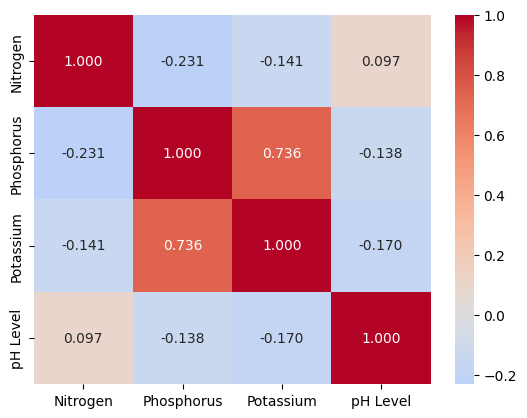

In [62]:
# Perform correlation analysis on the feature columns.
crop_corr = crop_data[feature_names].corr()

# Create a heatmap to visualize the correlation matrix using Seaborn.
sns.heatmap(crop_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0)

From the correlation analysis, **Phosphorus** and **Potassium** show a high correlation value of **0.74**, indicating a strong positive relationship between these two variables. This means that an increase in **Phosphorus** is associated with an increase in **Potassium**. The remaining features exhibit very low correlation values, suggesting no significant relationship between them.

## Data Splitting

Split the data into training and testing sets to evaluate the model's performance. The training set is used to train the model, while the testing set is used to assess how well the model performs on unseen data.


In [164]:
# Separate the features and target variable.
features = crop_data.drop(columns="crop", axis=1)
target = crop_data["crop"]

# Initialize the LabelEncoder.
label_encoder = LabelEncoder()

# Fit and transform the target labels.
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and test sets with an 80%-20% ratio.
x_train, x_test, y_train, y_test = train_test_split(features.values, target_encoded, test_size=0.1, random_state=66, stratify=target_encoded, shuffle=True)

In [165]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [166]:
# Define the parameter grid.
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 6],
    'criterion': ['entropy']
}


# Initialize the Random Forest model.
rf_model = RandomForestClassifier(random_state=66)

# Initialize GridSearchCV.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV.
grid_search.fit(x_train, y_train)

# Get the best parameters and best score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [167]:
# Get the best model.
best_rf_model = grid_search.best_estimator_

# Make predictions on the training and test data.
y_train_pred = best_rf_model.predict(x_train)
y_pred = best_rf_model.predict(x_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results.
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")
print(f"Accuracy on Test Set: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.82
Accuracy on Test Set: 0.76

Confusion Matrix:
[[ 4  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  3  0  0  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [168]:
# Testing Overall metrics
print("Overall Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Overall Training Precision:", precision_score(y_train, y_train_pred, average='macro'))
print("Overall Training Recall:", recall_score(y_train, y_train_pred, average='macro'))


# Testing Overall metrics
print("Overall Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Overall Testing Precision:", precision_score(y_test, y_pred, average='macro'))
print("Overall Testing Recall:", recall_score(y_test, y_pred, average='macro'))

Overall Training Accuracy: 0.9116161616161617
Overall Training Precision: 0.9180326505584535
Overall Training Recall: 0.9116161616161617
Overall Testing Accuracy: 0.7636363636363637
Overall Testing Precision: 0.7710482699119064
Overall Testing Recall: 0.7636363636363637


In [129]:
# Define the parameter grid for XGBoost.
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model.
xgb_model = XGBClassifier(random_state=66, use_label_encoder=False, eval_metric='mlogloss', objective="multi:softmax", num_class=22, learning_rate=0.001)

# Initialize GridSearchCV.
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV.
grid_search.fit(x_train, y_train)

# Get the best parameters and best score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [130]:
# Get the best model.
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training and test data.
y_train_pred = best_xgb_model.predict(x_train)
y_pred = best_xgb_model.predict(x_test)

# Evaluate the model.
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results.
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Score: 0.73
Training Accuracy: 0.78
Testing Accuracy: 0.70
Confusion Matrix:
[[ 9  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  2]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  6  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  1  1  0  0  0  3  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 

In [131]:
# Testing Overall metrics
print("Overall Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Overall Training Precision:", precision_score(y_train, y_train_pred, average='macro'))
print("Overall Training Recall:", recall_score(y_train, y_train_pred, average='macro'))


# Testing Overall metrics
print("Overall Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Overall Testing Precision:", precision_score(y_test, y_pred, average='macro'))
print("Overall Testing Recall:", recall_score(y_test, y_pred, average='macro'))

Overall Training Accuracy: 0.7757575757575758
Overall Training Precision: 0.8046680884973721
Overall Training Recall: 0.7757575757575759
Overall Testing Accuracy: 0.6954545454545454
Overall Testing Precision: 0.716719833197106
Overall Testing Recall: 0.6954545454545455


In [145]:
# Separate the features and target variable.
features = crop_data.drop(columns="crop", axis=1)
target = crop_data["crop"]

# Split the data into training and test sets with an 80%-20% ratio.
x_train, x_test, y_train, y_test = train_test_split(features.values, target, test_size=0.1, random_state=66, stratify=target, shuffle=True)

In [146]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [147]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_test = label_encoder.transform(y_test)

# Set data types for categorical labels
y_train = utils.to_categorical(y_train, num_classes=22)
y_test = utils.to_categorical(y_test, num_classes=22)
print('Ready...')

Ready...


In [148]:
hl = 80 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(90, input_dim=len(feature_names), activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(25, activation='relu'))
model.add(Dense(22, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 90)                450       
                                                                 
 dense_11 (Dense)            (None, 80)                7280      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_12 (Dense)            (None, 25)                2025      
                                                                 
 dense_13 (Dense)            (None, 22)                572       
                                                                 
Total params: 10327 (40.34 KB)
Trainable params: 10327 (40.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [154]:
#hyper-parameters for optimizer
learning_rate = 0.1
opt = optimizers.SGD(learning_rate=learning_rate, momentum=0.85)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model over 25 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 100
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/100
40/40 [==============================] - 7s 72ms/step - loss: 2.3945 - accuracy: 0.3146 - val_loss: 1.6626 - val_accuracy: 0.3318
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - loss: 1.4164 - accuracy: 0.4379 - val_loss: 1.3965 - val_accuracy: 0.4227
Epoch 3/100
40/40 [==============================] - 0s 12ms/step - loss: 1.1995 - accuracy: 0.4985 - val_loss: 1.0376 - val_accuracy: 0.5591
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 1.0510 - accuracy: 0.5556 - val_loss: 0.9306 - val_accuracy: 0.6136
Epoch 5/100
40/40 [==============================] - 1s 14ms/step - loss: 0.9080 - accuracy: 0.6157 - val_loss: 0.8084 - val_accuracy: 0.5909
Epoch 6/100
40/40 [==============================] - 1s 16ms/step - loss: 0.9262 - accuracy: 0.6015 - val_loss: 1.0588 - val_accuracy: 0.5818
Epoch 7/100
40/40 [==============================] - 1s 29ms/step - loss: 0.9733 - accuracy: 0.5737 - val_loss: 0.8915 - val_accuracy: 0.6273
Epoch 

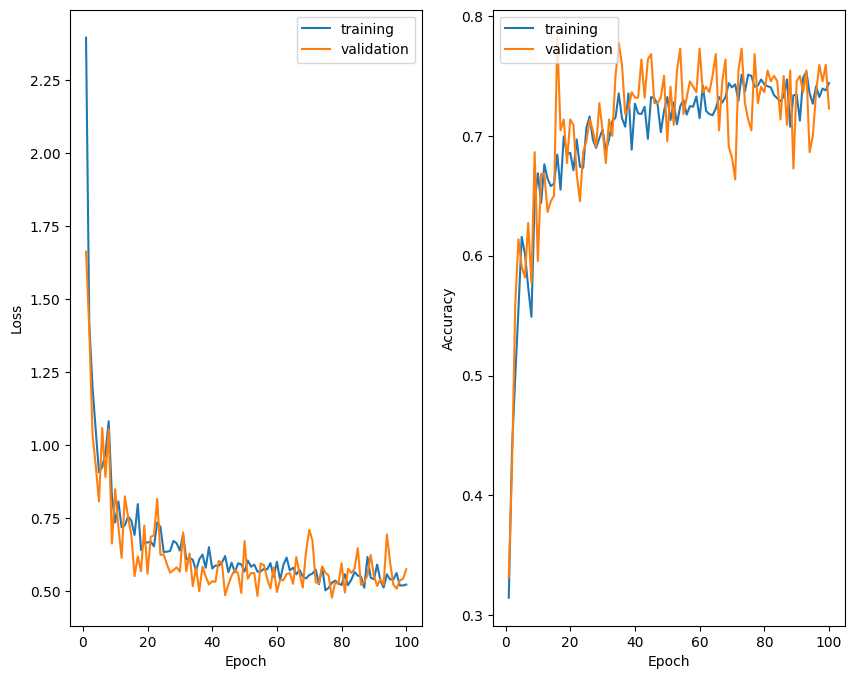

In [156]:
# Create a figure and axes object.
fig, ax = plt.subplots(1, 2, figsize=(10, 8))


epoch_nums = range(1, num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
ax[0].plot(epoch_nums, training_loss)
ax[0].plot(epoch_nums, validation_loss)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(['training', 'validation'], loc='upper right')



training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
ax[1].plot(epoch_nums, training_accuracy)
ax[1].plot(epoch_nums, validation_accuracy)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['training', 'validation'], loc='upper left')



plt.show()

7/7 [==============================] - 34s 60ms/step


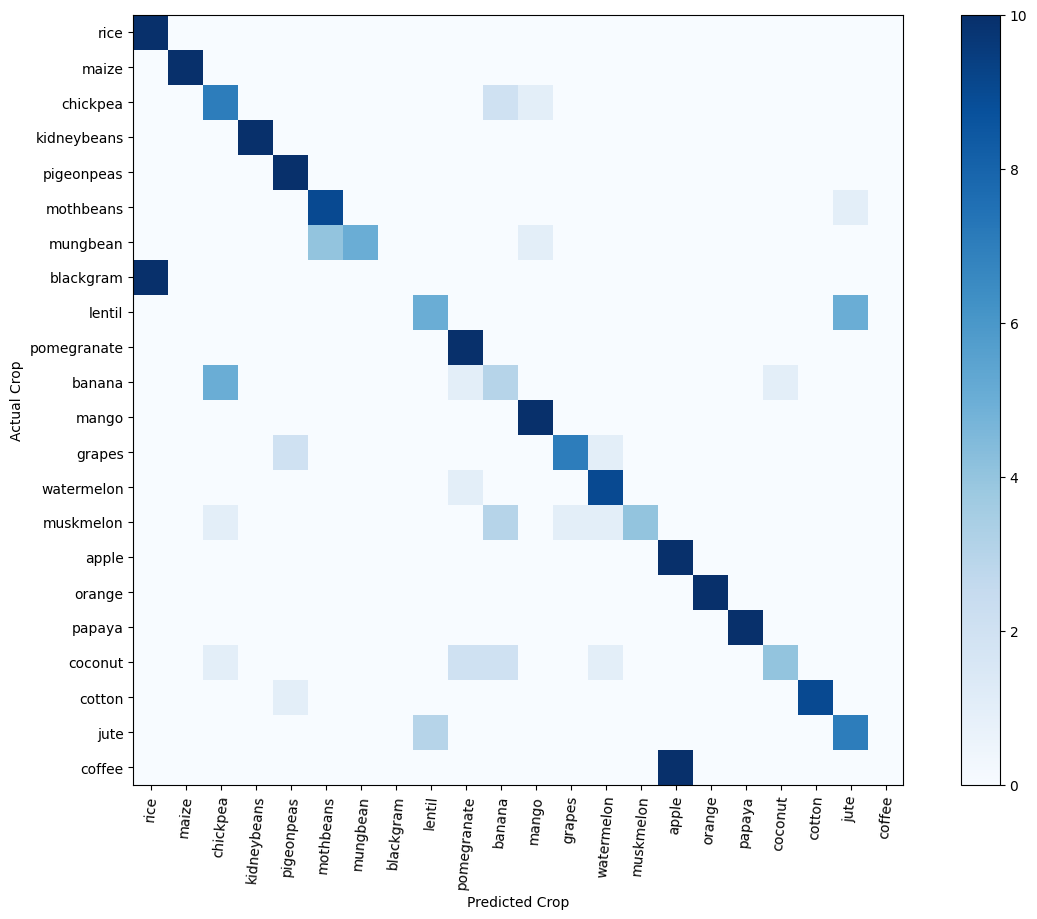

In [157]:
# Create a figure and axes object.
fig, ax = plt.subplots(figsize=(15, 10))

class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(22)
plt.xticks(tick_marks, target.unique(), rotation=85)
plt.yticks(tick_marks, target.unique())
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.show()

In [158]:
# Overall metrics
print("Overall Accuracy:", accuracy_score(true_labels, predictions))
print("Overall Precision:", precision_score(true_labels, predictions, average='macro'))
print("Overall Recall:", recall_score(true_labels, predictions, average='macro'))

Overall Accuracy: 0.7227272727272728
Overall Precision: 0.6998917748917749
Overall Recall: 0.7227272727272728
